In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('./titanic-data-set.csv')

# Probability Distribution Function (PDF)
First let's review the difference between discrete and continuous random variables:

- ***Discrete***: takes on a finite or countable number of values.
- ***Continuous***: takes on an infinite number of values

Because continuous random variables can take on an infinite number of values, we can't say with certantiy what value the variable will be at any point, so we have to instead provide an interval, or range of values that the variable could be

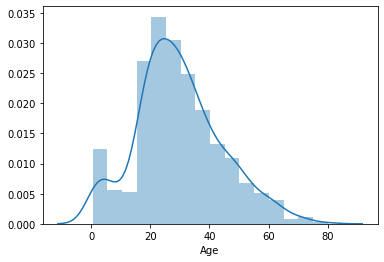

In [7]:
import seaborn as sns
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)

`Area under curve represents what percentage of passengers were between 20 and 25`

h * w = 122 / 714

h * 5 = 122 / 714

h = (122/714)/ 5

In [12]:
print(f'Height = {(122/714)/5}')

Height = 0.03417366946778712


In [23]:
def count_list(lst, lower, upper):
    count = 0
    
    for item in lst:
        if item >= lower and item <= upper:
            count += 1
    
    return count

In [24]:
ls_age = df['Age'].dropna().values

count_list(ls_age, 20, 25)

137

In [27]:
count_list(ls_age, 20.315, 25.28875)

122

In [33]:
count_list(ls_age, 0, 39.99)

551

In [34]:
551/714

0.7717086834733894


# Cumulative Density Function (CDF)
- In the above example, we could not easily obtain the percentage from a PDF, although it is possible.

- This is much easier if we use a ***CDF***. A CDF calculates the probability that a random variable is less than a threshold value

- Let's learn CDF by example: given an array of numbers (our random variable) and a threshold value as input:

    1. Find the minimum value in the array
    2. Set the threshold to be the minimum value of the array
    3. For a given array of numbers and a given threshold, count all of the elements in the array that are less than the threshold, and divide that count by the length of the array
    4. Repeat step three, increasing the threshold by one, until you go through step three where threshold is equal to the maximum value in the array

In [53]:
def lower_threshold(lst, lower):
    count = 0
    
    for item in lst:
        if item <= lower:
            count += 1
            
    return count/len(lst)

In [60]:
def calculate_cdf(lst, step):
    lower = min(lst)
    upper = max(lst)
    
    print(lower)
    print(upper)
    cdf = []
    
    for i in np.arange(lower, upper, step):
        count = lower_threshold(lst, i)
        cdf.append(count)
        
    return cdf
        

In [63]:
cdf_age = calculate_cdf(ls_age, 1)
print(cdf_age)

0.42
80.0
[0.0014005602240896359, 0.0196078431372549, 0.03361344537815126, 0.04201680672268908, 0.056022408963585436, 0.06162464985994398, 0.06582633053221289, 0.0700280112044818, 0.07563025210084033, 0.08683473389355742, 0.0896358543417367, 0.09523809523809523, 0.09663865546218488, 0.09943977591036414, 0.10784313725490197, 0.11624649859943978, 0.1400560224089636, 0.15826330532212884, 0.19467787114845939, 0.22969187675070027, 0.2507002801120448, 0.2857142857142857, 0.3235294117647059, 0.3445378151260504, 0.38795518207282914, 0.4215686274509804, 0.44677871148459386, 0.47198879551820727, 0.5070028011204482, 0.5378151260504201, 0.572829131652661, 0.5994397759103641, 0.6246498599439776, 0.6484593837535014, 0.6694677871148459, 0.696078431372549, 0.726890756302521, 0.7366946778711485, 0.7521008403361344, 0.7717086834733894, 0.7899159663865546, 0.8011204481792717, 0.819327731092437, 0.8263305322128851, 0.8389355742296919, 0.8557422969187675, 0.8627450980392157, 0.8753501400560224, 0.887955182

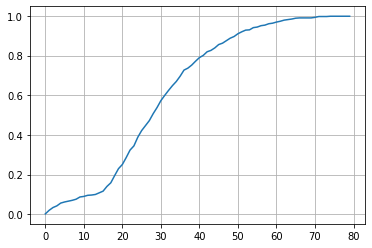

In [64]:
import matplotlib.pyplot as plt
plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)
plt.grid()